### Setup

In [1]:
getwd()

[1] "/var/www/kaggle/zillow-forecast"

In [2]:
library(data.table)
library(FSelector)
library(rworldmap)
library(rworldxtra)

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


### Load Data

In [21]:
properties <- fread("data/properties_2016.csv")
training.set <- read.csv("data/train_2016_v2.csv")

Warning message in fread("data/properties_2016.csv"):
“Bumped column 50 to type character on data row 10354, field contains 'true'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

Read 2985217 rows and 58 (of 58) columns from 0.604 GB file in 00:00:08


In [24]:
ls(properties)

[1] "airconditioningtypeid"        "architecturalstyletypeid"    
 [3] "assessmentyear"               "basementsqft"                
 [5] "bathroomcnt"                  "bedroomcnt"                  
 [7] "buildingclasstypeid"          "buildingqualitytypeid"       
 [9] "calculatedbathnbr"            "calculatedfinishedsquarefeet"
[11] "censustractandblock"          "decktypeid"                  
[13] "finishedfloor1squarefeet"     "finishedsquarefeet12"        
[15] "finishedsquarefeet13"         "finishedsquarefeet15"        
[17] "finishedsquarefeet50"         "finishedsquarefeet6"         
[19] "fips"                         "fireplacecnt"                
[21] "fireplaceflag"                "fullbathcnt"                 
[23] "garagecarcnt"                 "garagetotalsqft"             
[25] "hashottuborspa"               "heatingorsystemtypeid"       
[27] "landtaxvaluedollarcnt"        "latitude"                    
[29] "longitude"                    "lotsizesquarefeet"           
[31] "numberofstories"              "parcelid"                    
[33] "poolcnt"                      "poolsizesum"                 
[35] "pooltypeid10"                 "pooltypeid2"                 
[37] "pooltypeid7"                  "propertycountylandusecode"   
[39] "propertylandusetypeid"        "propertyzoningdesc"          
[41] "rawcensustractandblock"       "regionidcity"                
[43] "regionidcounty"               "regionidneighborhood"        
[45] "regionidzip"                  "roomcnt"                     
[47] "storytypeid"                  "structuretaxvaluedollarcnt"  
[49] "taxamount"                    "taxdelinquencyflag"          
[51] "taxdelinquencyyear"           "taxvaluedollarcnt"           
[53] "threequarterbathnbr"          "typeconstructiontypeid"      
[55] "unitcnt"                      "yardbuildingsqft17"          
[57] "yardbuildingsqft26"           "yearbuilt"

In [25]:
ls(training.set)

[1] "logerror"        "parcelid"        "transactiondate"

### Map

In [4]:
properties$longitude <- properties$longitude/1000000
properties$latitude <- properties$latitude/1000000

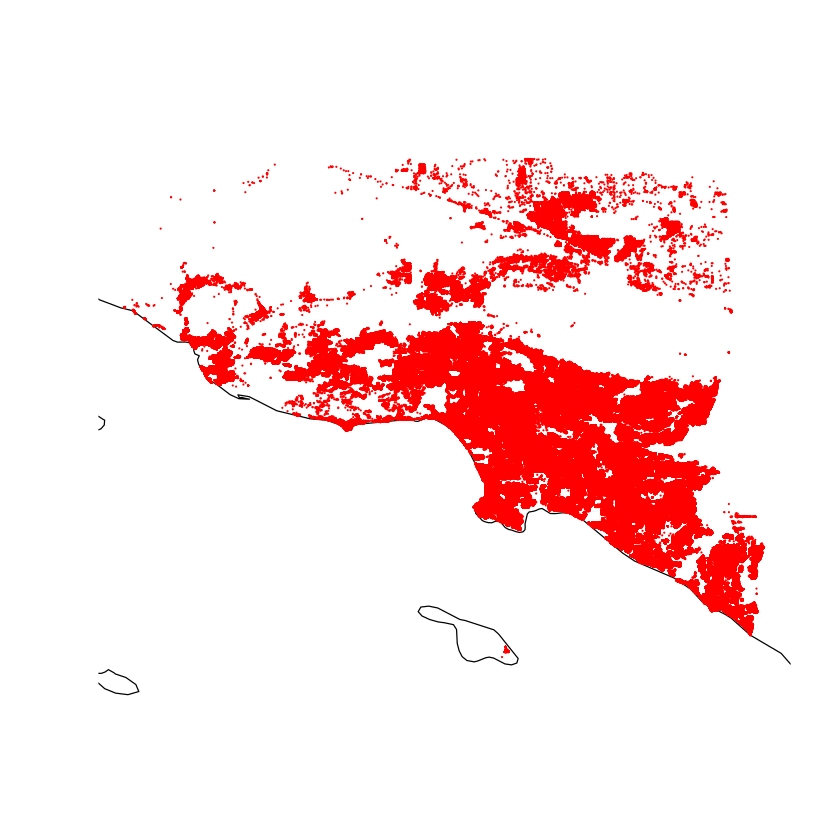

In [5]:
newmap <- getMap(resolution = "high")
plot(newmap, 
     xlim = c(min(properties$longitude, na.rm = TRUE), max(properties$longitude, na.rm = TRUE)), 
     ylim = c(min(properties$latitude, na.rm = TRUE), max(properties$latitude, na.rm = TRUE)), 
     asp = 1)

points(properties$longitude, properties$latitude, col = "red", cex = .1)

### Prepare Data

In [8]:
training.set[is.na(training.set)] <- 0
properties[is.na(properties)] <- 0
properties$censustractandblock <- factor(properties$censustractandblock)
training.set.merged <- merge(x = training.set, y = properties, by = "parcelid", all.x = TRUE)

### Gain Ratio

In [9]:
gain.ratio.feature.weights <- gain.ratio(logerror~., training.set.merged)
print(gain.ratio.feature.weights)

                             attr_importance
parcelid                        0.0081679029
transactiondate                 0.0019954063
airconditioningtypeid           0.0017371142
architecturalstyletypeid        0.0000000000
basementsqft                    0.0000000000
bathroomcnt                     0.0077297568
bedroomcnt                      0.0036417195
buildingclasstypeid             0.0000000000
buildingqualitytypeid           0.0068060060
calculatedbathnbr               0.0077361662
decktypeid                      0.0000000000
finishedfloor1squarefeet        0.0027157643
calculatedfinishedsquarefeet    0.0054131631
finishedsquarefeet12            0.0084911087
finishedsquarefeet13            0.0000000000
finishedsquarefeet15            0.0323885343
finishedsquarefeet50            0.0028002437
finishedsquarefeet6             0.0192842403
fips                            0.0091938293
fireplacecnt                    0.0035854440
fullbathcnt                     0.0062057334
garagecarc

In [10]:
gain.ratio.top.features <- cutoff.k(gain.ratio.feature.weights, 10)
print(gain.ratio.top.features)

 [1] "censustractandblock"   "finishedsquarefeet15"  "finishedsquarefeet6"  
 [4] "propertyzoningdesc"    "unitcnt"               "garagecarcnt"         
 [7] "yearbuilt"             "taxdelinquencyflag"    "taxdelinquencyyear"   
[10] "propertylandusetypeid"


### Information Gain

In [11]:
information.gain.feature.weights <- information.gain(logerror~., training.set.merged)
print(information.gain.feature.weights)

                             attr_importance
parcelid                        2.030146e-02
transactiondate                 1.084085e-02
airconditioningtypeid           1.232653e-03
architecturalstyletypeid        0.000000e+00
basementsqft                    0.000000e+00
bathroomcnt                     1.184954e-02
bedroomcnt                      4.977731e-03
buildingclasstypeid             0.000000e+00
buildingqualitytypeid           8.566429e-03
calculatedbathnbr               1.186269e-02
decktypeid                      0.000000e+00
finishedfloor1squarefeet        7.565559e-04
calculatedfinishedsquarefeet    7.663731e-03
finishedsquarefeet12            1.375808e-02
finishedsquarefeet13            0.000000e+00
finishedsquarefeet15            5.385760e-03
finishedsquarefeet50            7.809896e-04
finishedsquarefeet6             5.724792e-04
fips                            5.959091e-03
fireplacecnt                    1.215332e-03
fullbathcnt                     8.052671e-03
garagecarc

In [12]:
information.gain.top.features <- cutoff.k(information.gain.feature.weights, 10)
print(information.gain.top.features)

 [1] "censustractandblock"       "propertyzoningdesc"       
 [3] "rawcensustractandblock"    "parcelid"                 
 [5] "regionidzip"               "propertycountylandusecode"
 [7] "yearbuilt"                 "finishedsquarefeet12"     
 [9] "regionidcity"              "calculatedbathnbr"        


### Time features

In [13]:
date.info <- unclass(as.POSIXlt(training.set.merged$transactiondate))
ls(date.info)

[1] "gmtoff" "hour"   "isdst"  "mday"   "min"    "mon"    "sec"    "wday"  
 [9] "yday"   "year"   "zone"

In [16]:
date.feature.names <- c("mday", "mon", "year", "yday")
training.set.merged[date.feature.names] <- date.info[date.feature.names]

### All Features

In [18]:
training.set <- subset(training.set.merged, select = unique(c(gain.ratio.top.features, information.gain.top.features, date.feature.names, "logerror")))
test.set <- subset(properties, select = c(gain.ratio.top.features, information.gain.top.features))
results <- subset(properties, select= "parcelid")